In [1]:
!git clone https://github.com/VarunSivamani/Pytorch.git
%cd Pytorch/VAE/

Cloning into 'Pytorch'...
remote: Enumerating objects: 540, done.
remote: Counting objects: 100% (540/540), done.
remote: Compressing objects: 100% (492/492), done.
remote: Total 540 (delta 84), reused 479 (delta 28), pack-reused 0
Receiving objects: 100% (540/540), 17.05 MiB | 906.00 KiB/s, done.
Resolving deltas: 100% (84/84), done.
/content/Pytorch/VAE


In [2]:
! pip install git+https://github.com/PytorchLightning/lightning-bolts.git@master --upgrade --quiet
! pip install -r requirements.txt --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 48.6 MB/s eta 0:00:00


In [3]:
import torch
import pytorch_lightning as pl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from config import *
from model.VAELitModel import VAELitModel
from datamodule.cifar10 import CIFAR10DataModule

pl.seed_everything(1234)

/usr/local/lib/python3.10/dist-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:34: UnderReviewWarning: The feature generate_power_seq is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  "lr_options": generate_power_seq(LEARNING_RATE_CIFAR, 11),
/usr/local/lib/python3.10/dist-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:93: UnderReviewWarning: The feature FeatureMapContrastiveTask is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  contrastive_task: Union[FeatureMapContrastiveTask] = FeatureMapCon

1234

In [4]:
datamodule = CIFAR10DataModule(
    data_dir=DATA_DIR,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS
)
vae = VAELitModel()

trainer = pl.Trainer(
    gpus=1,
    max_epochs=30
)
trainer.fit(vae, datamodule)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/content/Pytorch/VAE/model/VAELitModel.py:19: UnderReviewWarning: The feature resnet18_encoder is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  self.encoder = resnet18_encoder(False, False)
/usr/local/lib/python3.10/dist-packages/pl_bolts/models/autoencoders/components.py:326: UnderReviewWarning: The feature ResNetEncoder is currently marked under review. The compatibility with other Lightning projects is 

100%|██████████| 170498071/170498071 [00:13<00:00, 12545601.99it/s]


Extracting /content/cifar-10-python.tar.gz to /content/


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type          | Params
--------------------------------------------------
0 | encoder         | ResNetEncoder | 11.2 M
1 | decoder         | ResNetDecoder | 8.6 M 
2 | fc_mu           | Linear        | 131 K 
3 | fc_var          | Linear        | 131 K 
4 | label_embedding | Embedding     | 5.1 K 
--------------------------------------------------
20.1 M    Trainable params
0         Non-trainable params
20.1 M    Total params
80.249    Total estimated model params size (MB)
/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(


Training: 0it [00:00, ?it/s]

Epoch: 1 | Loss: 4274.1552734375
Epoch: 2 | Loss: 3687.745849609375
Epoch: 3 | Loss: 3378.83251953125
Epoch: 4 | Loss: 3143.90087890625
Epoch: 5 | Loss: 3003.21630859375
Epoch: 6 | Loss: 2851.411376953125
Epoch: 7 | Loss: 2733.506103515625
Epoch: 8 | Loss: 2670.89453125
Epoch: 9 | Loss: 2601.98486328125
Epoch: 10 | Loss: 2523.502685546875
Epoch: 11 | Loss: 2468.69287109375
Epoch: 12 | Loss: 2450.515869140625
Epoch: 13 | Loss: 2432.31787109375
Epoch: 14 | Loss: 2414.954833984375
Epoch: 15 | Loss: 2397.84619140625
Epoch: 16 | Loss: 2381.676513671875
Epoch: 17 | Loss: 2366.038330078125
Epoch: 18 | Loss: 2357.426513671875
Epoch: 19 | Loss: 2343.391357421875
Epoch: 20 | Loss: 2330.560546875
Epoch: 21 | Loss: 2319.3564453125
Epoch: 22 | Loss: 2309.93408203125
Epoch: 23 | Loss: 2298.79833984375
Epoch: 24 | Loss: 2286.74365234375
Epoch: 25 | Loss: 2277.072021484375
Epoch: 26 | Loss: 2269.217529296875
Epoch: 27 | Loss: 2262.04443359375
Epoch: 28 | Loss: 2251.186767578125
Epoch: 29 | Loss: 2245.

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch: 30 | Loss: 2240.181884765625


In [5]:
test_loader = datamodule.test_dataloader()

dataiter = iter(test_loader)
data_next = next(dataiter)
images, labels = data_next

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
labels_inc = []

for i in labels:
    incorrect_label = torch.randint(low=0, high=10, size=(1,)).item()

    while incorrect_label == i:
        incorrect_label = torch.randint(low=0, high=10, size=(1,)).item()

    labels_inc.append(incorrect_label)

In [7]:
device = "cpu"

labels_corr = torch.IntTensor(labels_inc)
images, labels_corr = images.to(device), labels_corr.to(device)

with torch.no_grad():
    pred = vae((images, labels_corr))

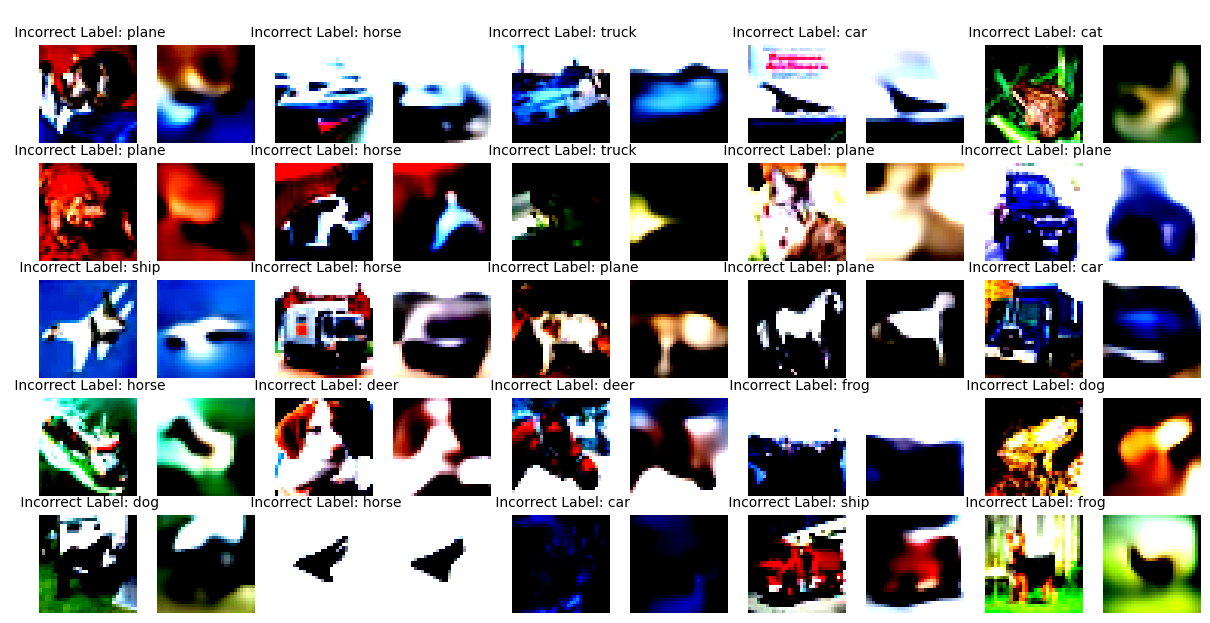

In [9]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

ind = 0
fig = plt.figure(figsize=(15,15))
for i in range(25):
    lbl_corr = labels[i]
    img_corr = images[i]
    img_new = pred[i]
    lbl_new = labels_corr[i]
    ind = ind+1
    ax = fig.add_subplot(10, 10,ind )
    ax.axis("off")
    ax.imshow(np.transpose(img_corr.squeeze(0).cpu().numpy(), (1, 2, 0)))
    ax.set_title(f'\n Incorrect Label: {classes[lbl_new.detach()]}',fontsize=10)
    ind = ind+1
    ax = fig.add_subplot(10, 10, ind)
    ax.axis("off")
    ax.imshow(np.transpose(img_new.squeeze(0).cpu().detach().numpy(), (1, 2, 0)))